## Завантаження [даних](https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data/data) та їх обробка

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Завантаження датасету
df = pd.read_csv("..\\data\\xAPI-Edu-Data.csv")

# Перевірка відсутніх значень
print(df.isnull().sum())

# Преобробка категоріальних змінних
df = pd.get_dummies(df, drop_first=True)

# Видалення колонки Class_L (якщо вона є)
df = df.drop(["Class_L"], axis=1, errors='ignore')

# Розділення даних на ознаки та цільову змінну
X = df.drop("Class_M", axis=1)
y = df["Class_M"]

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


## Розділення на тренувальну та тестову вибірки

In [ ]:
# Розділення на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабування даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Навчання моделей (Random Forest, AdaBoost, Gradient Boosting)

In [4]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train_scaled, y_train)
y_pred_ada = ada_model.predict(X_test_scaled)

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

## Оцінка якості моделей

In [6]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Оцінка якості моделей
def print_metrics(y_test, y_pred, model_name):
    print(f"{model_name}:")
    print(f"Точність: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Точність (precision): {precision_score(y_test, y_pred, average='binary'):.2f}")
    print(f"Повнота (recall): {recall_score(y_test, y_pred, average='binary'):.2f}")
    print(f"F1-оцінка: {f1_score(y_test, y_pred, average='binary'):.2f}")
    print(classification_report(y_test, y_pred))
    print('\n')

print_metrics(y_test, y_pred_rf, "Random Forest")
print_metrics(y_test, y_pred_ada, "AdaBoost")
print_metrics(y_test, y_pred_gb, "Gradient Boosting")

Random Forest:
Точність: 0.78
Точність (precision): 0.78
Повнота (recall): 0.76
F1-оцінка: 0.77
              precision    recall  f1-score   support

       False       0.79      0.80      0.80        76
        True       0.78      0.76      0.77        68

    accuracy                           0.78       144
   macro avg       0.78      0.78      0.78       144
weighted avg       0.78      0.78      0.78       144



AdaBoost:
Точність: 0.67
Точність (precision): 0.64
Повнота (recall): 0.69
F1-оцінка: 0.67
              precision    recall  f1-score   support

       False       0.70      0.66      0.68        76
        True       0.64      0.69      0.67        68

    accuracy                           0.67       144
   macro avg       0.67      0.67      0.67       144
weighted avg       0.68      0.67      0.67       144



Gradient Boosting:
Точність: 0.73
Точність (precision): 0.72
Повнота (recall): 0.69
F1-оцінка: 0.71
              precision    recall  f1-score   support



## Візуалізація матриць невідповідностей

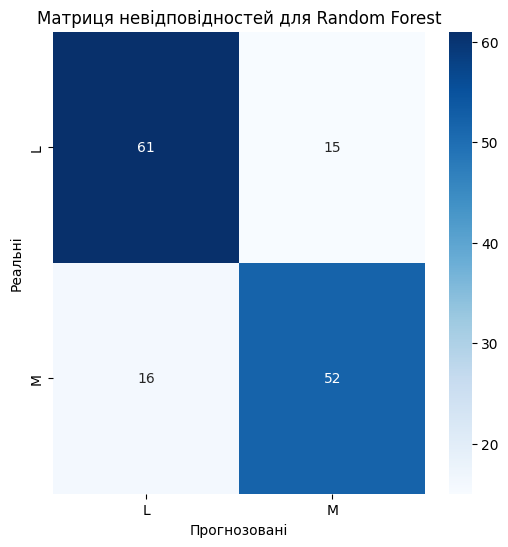

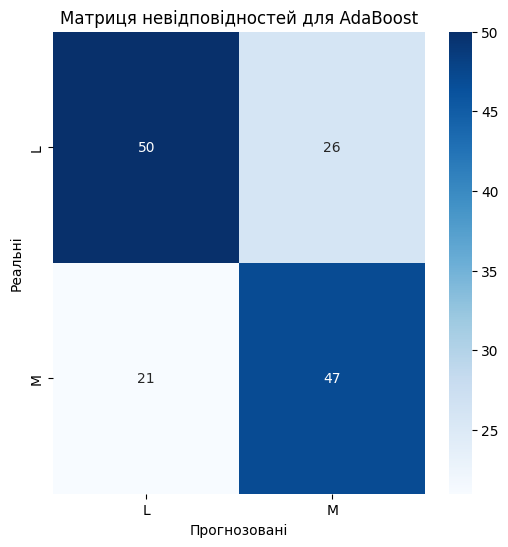

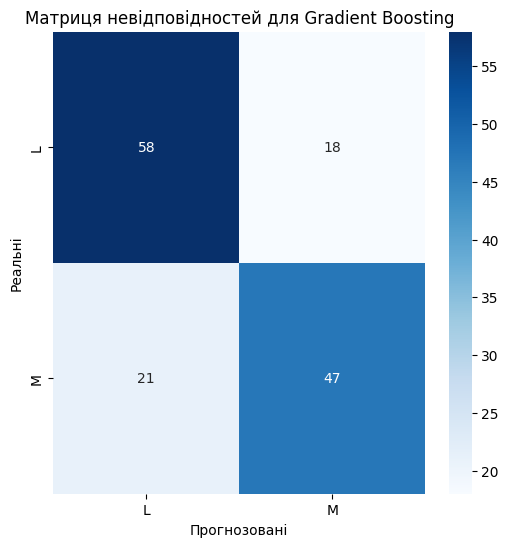

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Візуалізація матриць невідповідностей
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["L", "M"], yticklabels=["L", "M"])
    plt.title(f"Матриця невідповідностей для {model_name}")
    plt.xlabel("Прогнозовані")
    plt.ylabel("Реальні")
    plt.show()

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_ada, "AdaBoost")
plot_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting")


## Візуалізація важливості ознак для моделей

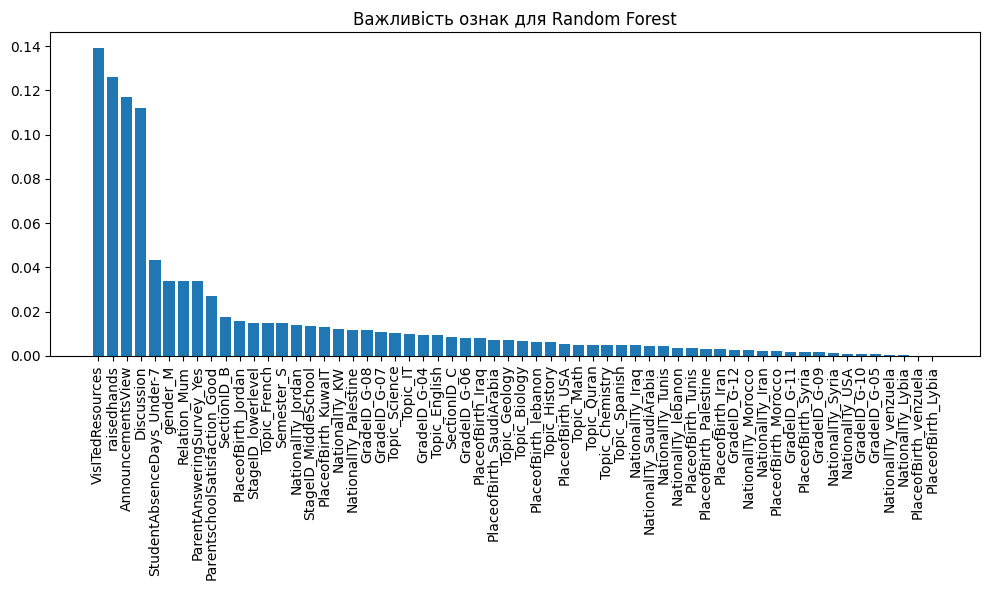

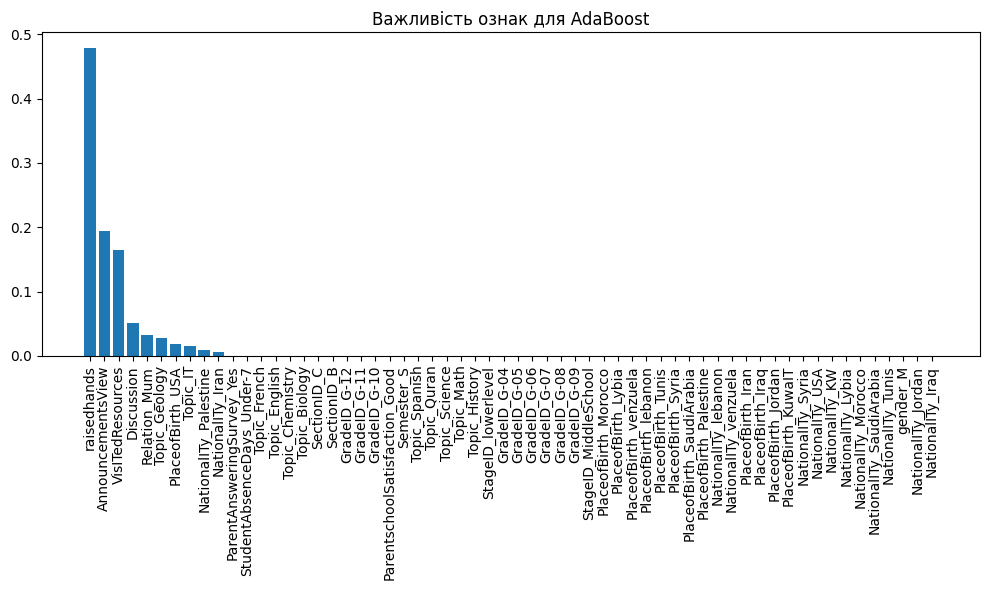

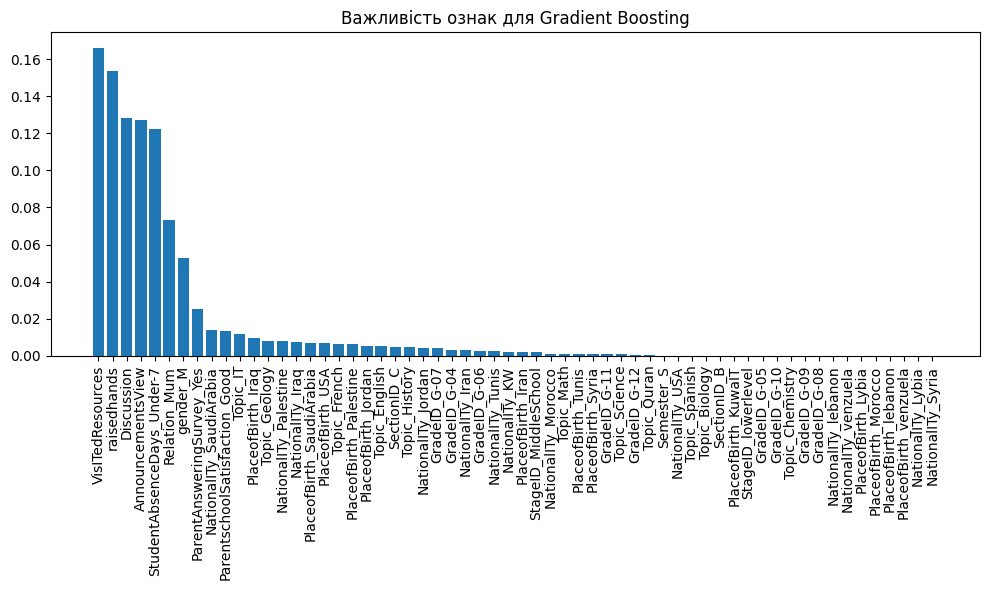

In [8]:
# Візуалізація важливості ознак для моделей
def plot_feature_importance(model, model_name, X_train):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(10,6))
        plt.title(f"Важливість ознак для {model_name}")
        plt.bar(range(X_train.shape[1]), importances[indices], align="center")
        plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
        plt.tight_layout()
        plt.show()

plot_feature_importance(rf_model, "Random Forest", X_train)
plot_feature_importance(ada_model, "AdaBoost", X_train)
plot_feature_importance(gb_model, "Gradient Boosting", X_train)